# Implemnting Decision Tree ID3 Algorithm

In [36]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

In [37]:
df = pd.read_csv("BreastCancer.csv") #read the data
df.head() #view the first five rows


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Calculate cnofusion matrix & Classification report using sklearn.tree model

In [38]:

X = df.drop(columns=['diagnosis','Unnamed: 32']) #Unamed:32 contains Nan values so we drop it
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) #split the data


In [39]:

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test) #make prediciton

In [40]:
ac = accuracy_score(y_test,classifier.predict(X_test))
print('Accuracy is: ',ac*100)

Accuracy is:  94.73684210526315


confusion matrix:
 [[63  2]
 [ 4 45]]


<Axes: >

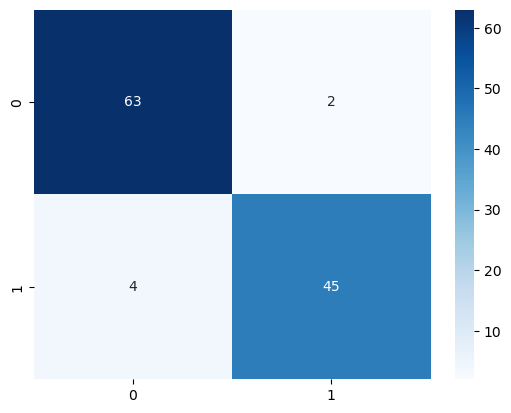

In [41]:
#get the confusion matrix


print("confusion matrix:\n",confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred), cmap="Blues", annot=True)

In [42]:
#print the classification report
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           B       0.94      0.97      0.95        65
           M       0.96      0.92      0.94        49

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114

